<a href="https://colab.research.google.com/github/SowmyaDontha88/Machine_Learning/blob/main/Random_forest_Company_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# **Problem Statement->**To find out the attributes or features of a company that causing high sales

In [ ]:
data = pd.read_csv('/content/Company_Data.csv')

In [ ]:
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# **EDA**

In [ ]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

<Axes: >

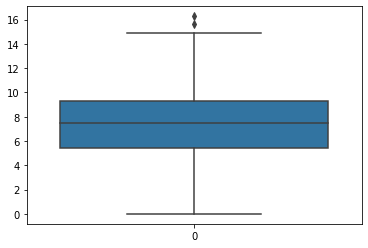

In [ ]:
sns.boxplot(data['Sales'])

Text(0.5, 0.98, '')

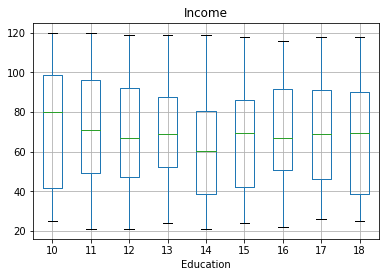

In [ ]:
data.boxplot(column='Income',by='Education')
plt.suptitle("")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='CompPrice', ylabel='Density'>

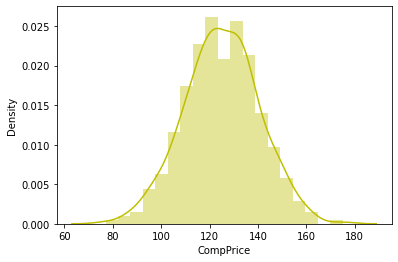

In [ ]:
sns.distplot(data['CompPrice'],color='y')

<Axes: xlabel='Age'>

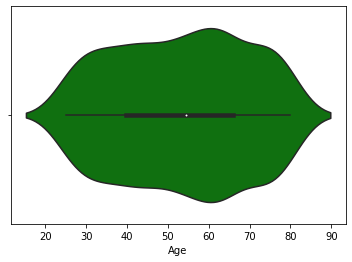

In [ ]:
sns.violinplot(data=data, x="Age",color='g')

In [ ]:
corr = data.corr()

In [ ]:
data = pd.get_dummies(data,columns=['ShelveLoc','Urban','US'])

In [ ]:
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


<Figure size 720x720 with 0 Axes>

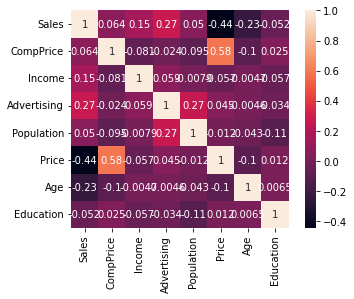

<Figure size 720x720 with 0 Axes>

In [ ]:
sns.heatmap(corr,square=True,annot=True)
plt.figure(figsize=(10,10))

Spliting the sales column into small and large sales 

In [ ]:
data["sales"]="small"
data.loc[data["Sales"]>7.49,"sales"]="large"
data.drop(["Sales"],axis=1,inplace=True)

In [ ]:
data['sales']

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [ ]:
X = data.iloc[:,0:14]
y = data.iloc[:,14]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
kfold = KFold(n_splits=10, random_state=None)

# **Random Forest model**

In [ ]:
model = RandomForestClassifier(n_estimators=600, max_features=3,criterion='entropy')

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=600)

In [ ]:
results = cross_val_score(model, X_test, Y_test, cv=kfold)
print(results.mean()) 

0.7000000000000001


In [ ]:
pred_test = model.predict(X_test)

In [ ]:
accuracy_score(Y_test,pred_test)

0.775

In [ ]:
accuracy_score(Y_test,pred_test)

0.775

# **GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model1=RandomForestClassifier()

In [ ]:
param_grid = { 
    'n_estimators': [200, 500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 600]})

In [ ]:
print('Tunning Parameters:{}'.format(CV_rfc.best_params_))

Tunning Parameters:{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 600}


In [ ]:
print('Accuracy: {}'.format(CV_rfc.best_score_))

Accuracy: 0.8071428571428572


With GridSearchCV model we can try and mix all the parameters and find out which parameters give highest accuracy.

In [ ]:
model.feature_importances_

array([0.11207103, 0.09275266, 0.11125761, 0.09059045, 0.19860936,
       0.13639897, 0.05532918, 0.04662863, 0.08066977, 0.02777337,
       0.01134355, 0.01106998, 0.01317117, 0.01233428])

In [ ]:
feature_imp =pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
feature_imp

,feature,importance
4,Price,0.198609
5,Age,0.136399
0,CompPrice,0.112071
2,Advertising,0.111258
1,Income,0.092753
3,Population,0.090590
8,ShelveLoc_Good,0.080670
6,Education,0.055329
7,ShelveLoc_Bad,0.046629
9,ShelveLoc_Medium,0.027773


# **From the above we can say that the important features are price, age,income and CompPrice**